In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [15]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cities_and_states.csv', usecols=['City', 'State', 'Latitude', 'Longitude','filename'])

# Define the city you want to search for (case-insensitive)
city_to_search = 'oakland'

# Convert city names to lowercase for case-insensitive matching
df['City'] = df['City'].str.lower()

# Find the row with the specified city
row = df.loc[df['City'] == city_to_search]

# If the city is found, extract the latitude and longitude
if not row.empty:
    city = row['City'].values[0].capitalize()  # Capitalize the city name
    state = row['State'].values[0]
    latitude = row['Latitude'].values[0]
    longitude = row['Longitude'].values[0]
    filename= row['filename'].values[0]

    print(f"City: {city}")
    print(f"State: {state}")
    print(f"Latitude: {latitude}")
    print(f"Longitude: {longitude}")
    print(f"filename: {filename}")
else:
    print(f"City '{city_to_search}' not found in the DataFrame.")

City: Oakland
State: California
Latitude: 37.8044
Longitude: -122.2712
filename: oakland_bnb.csv


# Clean Data

In [16]:
import pandas as pd

# Read the CSV file
city = city.lower()
data = pd.read_csv(city + '_bnb.csv')

# Print the original data information
print("Original data:")
data.info()

# Drop rows where any of the specified columns have missing values
required_columns = ['neighbourhood_cleansed', 'price', 'beds']
data = data.dropna(subset=required_columns)

# Clean the 'price' column
data['price'] = data['price'].str.replace('[$,]', '', regex=True).astype(float)

# Print the cleaned data information
print("\nCleaned data:")
data.info()

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_' + city + '_bnb.csv', index=False)

Original data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2749 non-null   int64  
 1   listing_url                                   2749 non-null   object 
 2   scrape_id                                     2749 non-null   int64  
 3   last_scraped                                  2749 non-null   object 
 4   source                                        2749 non-null   object 
 5   name                                          2749 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         1814 non-null   object 
 8   picture_url                                   2749 non-null   object 
 9   host_id                                       27

In [17]:
# Glimpse of Data
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3083,https://www.airbnb.com/rooms/3083,20231220185646,2023-12-20,city scrape,Home in Oakland · ★4.73 · 1 bedroom · 1 bed · ...,NaN,The neighborhood is in a historic district wit...,https://a0.muscache.com/pictures/miso/Hosting-...,3518,...,4.88,4.58,4.68,NaN,t,7,0,7,0,0.52
1,3264,https://www.airbnb.com/rooms/3264,20231220185646,2023-12-20,city scrape,Home in Oakland · ★4.52 · 1 bedroom · 1 bed · ...,NaN,This neighborhood has become very very popular...,https://a0.muscache.com/pictures/322655/94b9c2...,3241,...,4.95,4.67,4.38,NaN,f,4,0,4,0,0.21
2,5739,https://www.airbnb.com/rooms/5739,20231220185646,2023-12-20,city scrape,Guest suite in Oakland · ★4.97 · Studio · 1 be...,NaN,"We love the proximity to great restaurants, Wh...",https://a0.muscache.com/pictures/116966/376a1f...,9276,...,4.98,4.92,4.92,NaN,f,1,1,0,0,1.82
3,23637,https://www.airbnb.com/rooms/23637,20231220185646,2023-12-20,city scrape,Home in Oakland · ★4.87 · 1 bedroom · 1 bed · ...,NaN,Quiet residential neighborhood surrounded by o...,https://a0.muscache.com/pictures/354b693c-06df...,93339,...,4.89,4.95,4.89,NaN,f,1,0,1,0,0.29
4,24916,https://www.airbnb.com/rooms/24916,20231220185646,2023-12-21,city scrape,Guest suite in Oakland · ★4.52 · Studio · 2 be...,NaN,"great neighborhood, for walking , beautiful ga...",https://a0.muscache.com/pictures/2417484/1098d...,98716,...,4.70,4.83,4.54,NaN,f,2,2,0,0,0.82


In [18]:
# Group by host_id and count listings, sort by count
popular_hosts = data.groupby('host_id').size().sort_values(ascending=False).head(10)
popular_hosts

host_id
263143710    44
107434423    29
2498001      24
434182021    21
502000472    18
6722695      17
5492973      17
195751579    14
227225802    12
1556814      12
dtype: int64

# Popular hosts in a given city

C:\Users\xxdar\AppData\Local\Temp\ipykernel_23056\3699910847.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
C:\Users\xxdar\AppData\Local\Temp\ipykernel_23056\3699910847.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


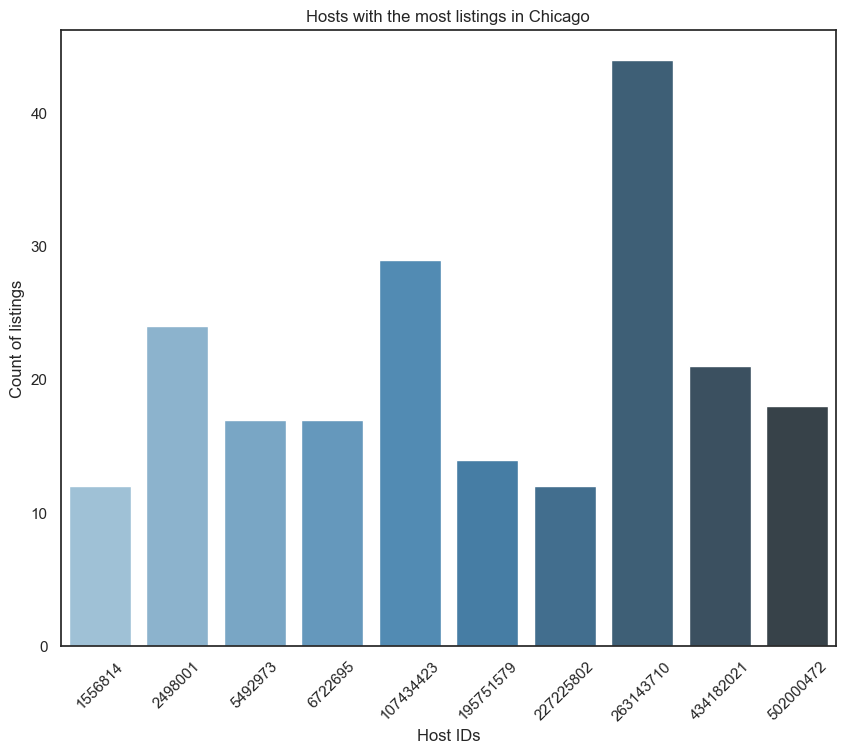

In [19]:
# Prepare data for visualization from earlier top hosts data
top_host_df = pd.DataFrame(popular_hosts).reset_index()
top_host_df.columns = ['Host_ID', 'P_Count']

# Set figure size and style for visualization
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

# Create bar plot to visualize top hosts with the most listings
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df, palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Chicago')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Show plot
plt.show()

# Neighborhoods in a given city

In [20]:
# Display unique neighborhoods in the dataset
unique_neighborhoods = data['neighbourhood_cleansed'].unique()
unique_neighborhoods

array(['Prescott', 'Temescal', 'Adams Point', 'Montclair',
       'Piedmont Avenue', 'Bushrod', 'Upper Dimond', 'Millsmont',
       'Shafter', 'Merriwood', 'Upper Rockridge', 'Cleveland Heights',
       'Rockridge', 'Northgate', 'Longfellow', 'Forestland',
       'Sausal Creek', 'Fairview Park', 'Castlemont', 'Claremont',
       'Shepherd Canyon', 'Oakland Ave-Harrison St', 'Allendale',
       'Mosswood', 'Frick', 'Reservoir Hill-Meadow Brook', 'Lakeshore',
       'Clawson', 'Trestle Glen', 'Santa Fe', 'Paradise Park',
       'Piedmont Pines', 'Mountain View Cemetery', 'Sequoyah',
       'Redwood Heights', 'Golden Gate', 'South Kennedy Tract',
       'Skyline-Hillcrest Estates', 'Oakmore', 'Glenview',
       'Crocker Highland', 'Grand Lake', 'Woodland', 'Downtown',
       'Oak Center', 'Lincoln Highlands', 'Lake Merritt', 'Gaskill',
       'Fairfax', 'Tuxedo', 'Panoramic Hill', 'Chabot Park', 'Lakewide',
       'Pill Hill', 'Ivy Hill', 'Harrington', 'Maxwell Park',
       'McClymonds',

# Violin plots for Neighborhoods in a given city
## The violin plot uses KDE to show the density of the data, which reflects the probability distribution of the data. This is depicted as the width of the violin at different levels of the variable. A wider section of a violin means a higher density, i.e., more data points are found at that price level.

C:\Users\xxdar\AppData\Local\Temp\ipykernel_23056\2515794256.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz = sns.violinplot(data=filtered_data, x='neighbourhood_cleansed', y='price', palette="muted")
C:\Users\xxdar\AppData\Local\Temp\ipykernel_23056\2515794256.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=45, horizontalalignment='right')


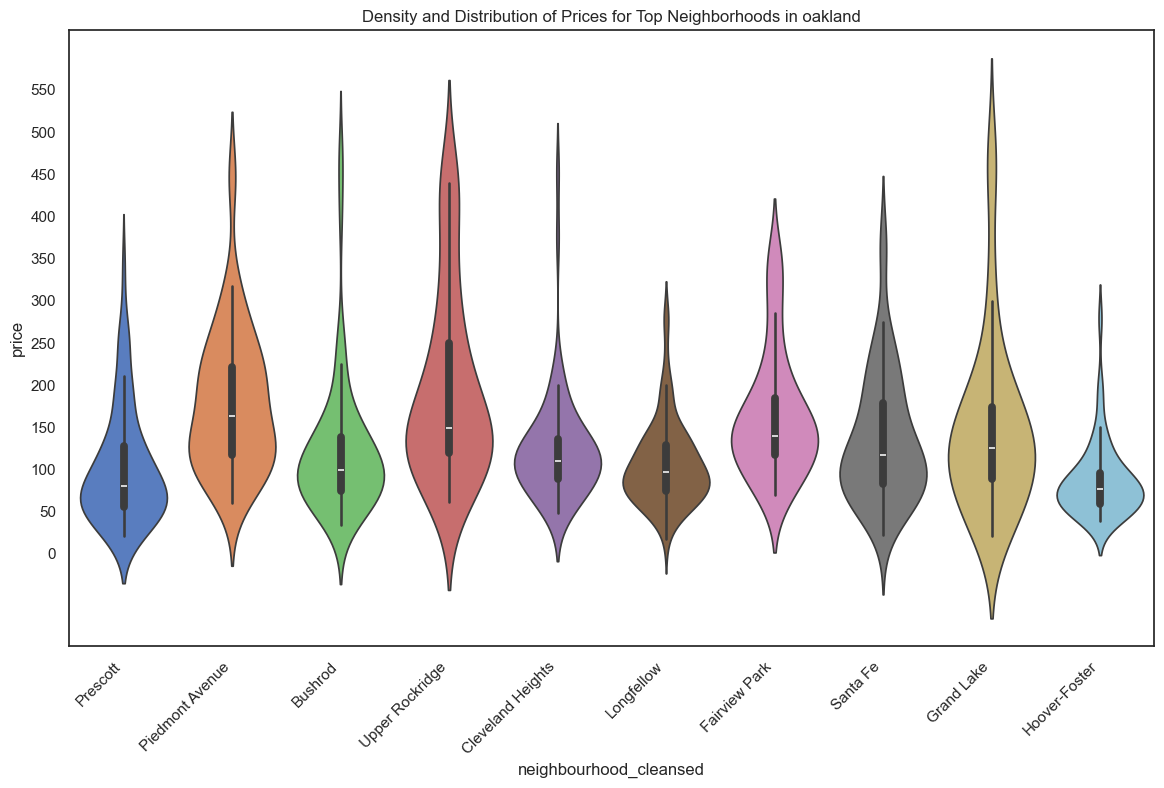

                        count        mean         std   min     25%    50%  \
neighbourhood_cleansed                                                       
Bushrod                  73.0  122.356164   82.210328  34.0   75.00  100.0   
Cleveland Heights        63.0  124.650794   65.945520  49.0   89.00  110.0   
Fairview Park            52.0  164.769231   75.175250  70.0  117.25  140.0   
Grand Lake               50.0  148.900000  106.460350  21.0   88.50  125.0   
Hoover-Foster            50.0   86.760000   44.137799  39.0   59.25   76.5   
Longfellow               79.0  106.202532   49.242305  18.0   75.00   97.0   
Piedmont Avenue          60.0  179.750000   83.909884  60.0  117.50  163.5   
Prescott                 91.0  102.428571   68.635129  21.0   55.50   80.0   
Santa Fe                 51.0  136.137255   76.767446  22.0   82.50  117.0   
Upper Rockridge          44.0  196.000000  111.538293  62.0  119.50  149.5   

                           75%    max  
neighbourhood_cleansed 

In [21]:
# Count the number of listings in each neighborhood
neighborhood_counts = data['neighbourhood_cleansed'].value_counts()

# Pick the top 10 neighborhoods with the most listings
top_neighborhoods = neighborhood_counts.nlargest(10).index.tolist()

# Filter the data for the top neighborhoods
top_neighborhoods_data = data[data['neighbourhood_cleansed'].isin(top_neighborhoods)]

# Filter out listings with prices above $500
filtered_data = top_neighborhoods_data[top_neighborhoods_data['price'] < 500]

# Generate statistical summaries for each neighborhood
price_stats = filtered_data.groupby('neighbourhood_cleansed')['price'].describe(percentiles=[.25, .50, .75])

# Visualize the density and distribution of prices for each neighborhood using a violin plot
plt.figure(figsize=(14, 8))
viz = sns.violinplot(data=filtered_data, x='neighbourhood_cleansed', y='price', palette="muted")
viz.set_title(f'Density and Distribution of Prices for Top Neighborhoods in {city}')
viz.set_xticklabels(viz.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add more tick marks to the y-axis
current_yticks = viz.get_yticks()
new_yticks = list(range(0, int(filtered_data['price'].max()) + 100, 50))
viz.set_yticks(new_yticks)

plt.show()

print(price_stats)

# Number of listings by room type visualization for top neighborhoods

<Figure size 1400x800 with 0 Axes>

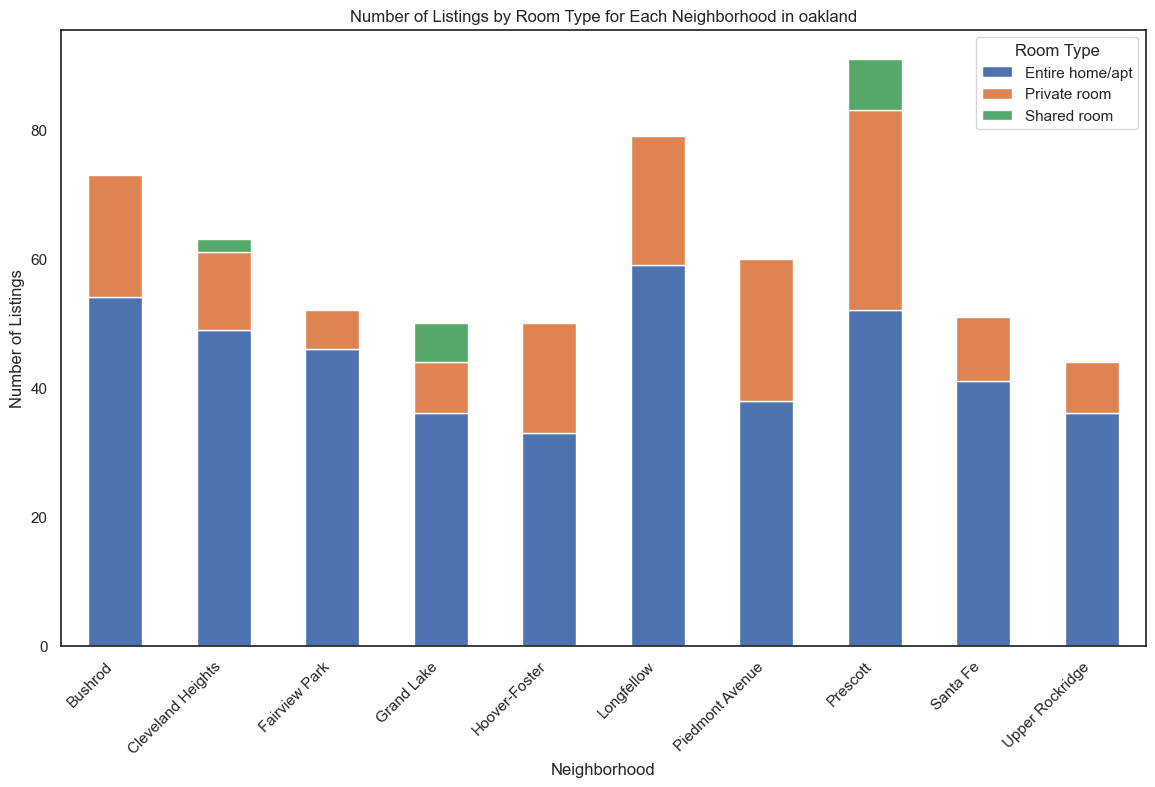

In [22]:
# Ensures 'room_type' column is present
if 'room_type' in data.columns:
    # Group data by neighborhood and room type, then count the number of listings in each group
    room_type_counts = filtered_data.groupby(['neighbourhood_cleansed', 'room_type']).size().unstack(fill_value=0)

    # Plotting the data
    plt.figure(figsize=(14, 8))
    room_type_plot = room_type_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    room_type_plot.set_title(f'Number of Listings by Room Type for Each Neighborhood in {city}')
    room_type_plot.set_xlabel('Neighborhood')
    room_type_plot.set_ylabel('Number of Listings')
    room_type_plot.legend(title='Room Type')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()

    room_type_counts
else:
    "The 'room_type' column is missing from your dataset. Please check the dataset or provide the correct column name."


# Price distributions by room types in top neighborhoods

C:\Users\xxdar\AppData\Local\Temp\ipykernel_23056\645223161.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz.set_xticklabels(viz.get_xticklabels(), rotation=45, horizontalalignment='right')


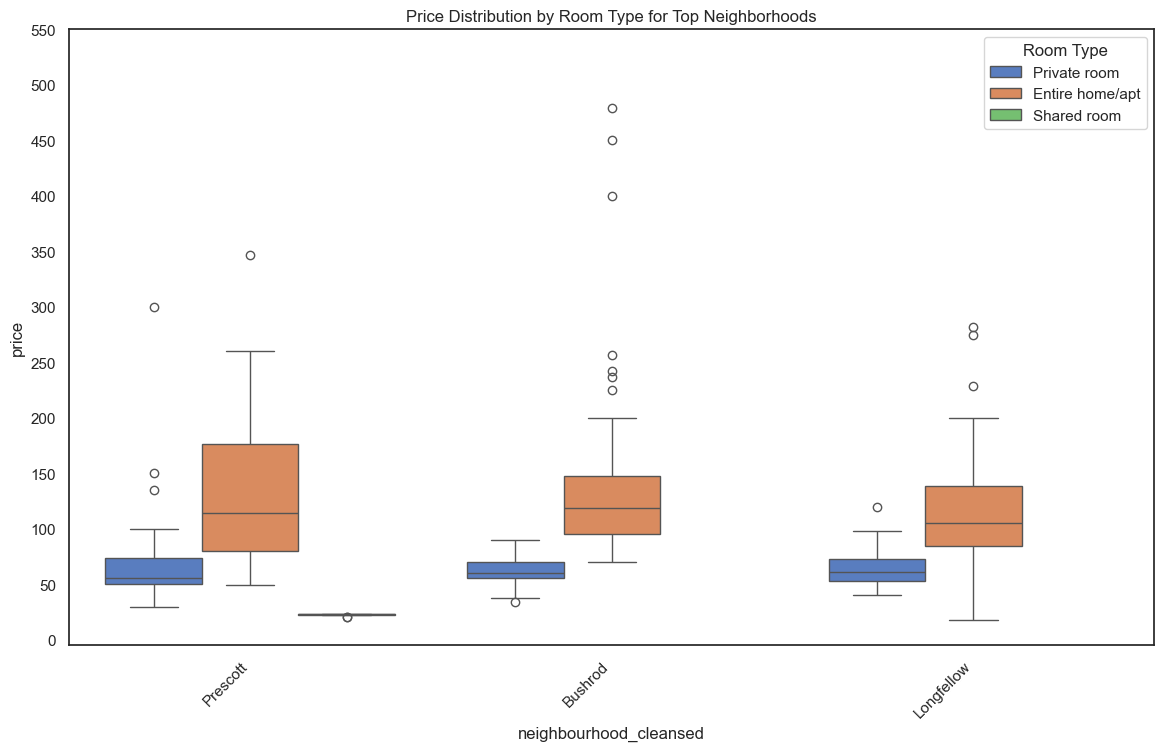

In [23]:
# Count the number of listings in each neighborhood
neighborhood_counts = data['neighbourhood_cleansed'].value_counts()

# Pick the top 3 neighborhoods with the most listings
top_neighborhoods = neighborhood_counts.nlargest(3).index.tolist()

# Filter the data for the top neighborhoods
top_neighborhoods_data = data[data['neighbourhood_cleansed'].isin(top_neighborhoods)]

# Filter out listings with prices above $500
filtered_data = top_neighborhoods_data[top_neighborhoods_data['price'] < 500]

# Visualize the density and distribution of prices for each neighborhood using a box plot
plt.figure(figsize=(14, 8))
viz = sns.boxplot(data=filtered_data, x='neighbourhood_cleansed', y='price', hue='room_type', palette="muted")
viz.set_title('Price Distribution by Room Type for Top Neighborhoods')
viz.set_xticklabels(viz.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add more tick marks to the y-axis
current_yticks = viz.get_yticks()
new_yticks = list(range(0, int(filtered_data['price'].max()) + 100, 50))
viz.set_yticks(new_yticks)

plt.legend(title='Room Type')
plt.show()

## This script trains a linear regression model to predict rental listing prices based on attributes such as number of beds, bathrooms, host response rates, and review scores. It preprocesses the data by extracting numerical values, converting percentages, and filling missing entries with median values. The model is evaluated using training and testing sets to determine its accuracy, measured by Mean Squared Error and R-squared metrics. Additionally, it demonstrates how to use the model to predict prices for specific new listings, providing a practical tool for real-time price estimation.

In [24]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract numerical values from bathrooms_text and clean other features
data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Convert percentages to floats, ensuring they are treated as strings first
data['host_response_rate'] = data['host_response_rate'].astype(str).str.replace('%', '').astype(float) / 100
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float) / 100

# Fill missing values with the median for numerical columns
median_values = data[['beds', 'bathrooms', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness']].median()
data.fillna(median_values, inplace=True)

# Define features and target variable
features = ['beds', 'bathrooms', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness']
X = data[features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Predict using a custom input
input_features = {
    'beds': [2],
    'bathrooms': [1.5],
    'host_response_rate': [0.95],
    'host_acceptance_rate': [0.85],
    'accommodates': [4],
    'number_of_reviews': [50],
    'review_scores_rating': [4.2],
    'review_scores_cleanliness': [4.5]
}
input_data = pd.DataFrame(input_features)
predicted_price = model.predict(input_data)
print(f"The predicted price for your listing is: ${predicted_price[0]:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

The predicted price for your listing is: $173.66
Mean Squared Error: 11036.66
R^2 Score: 0.39


# Heatmap for identifying hotspots, in different ares of a given city with higher property rent prices.

In [25]:
import folium
from folium.plugins import HeatMap

# Create a basic map centered around Chicago
map_city = folium.Map(location=[latitude, longitude], zoom_start=13)

# Prepare data for the heatmap, removing NaN values
clean_data = data.dropna(subset=['latitude', 'longitude', 'price'])
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in clean_data.iterrows()]

# Add a heatmap layer
HeatMap(heat_data, radius=9, blur=9).add_to(map_city)

# Display the map
map_city
